In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import healpy as hp

import sys
from pSZ import pSZ

### Create pSZ class

In [2]:
theory = pSZ()

### Plot some of the polarized SZ transfer functions

Text(0, 0.5, '$h_2(k,z)$ ')

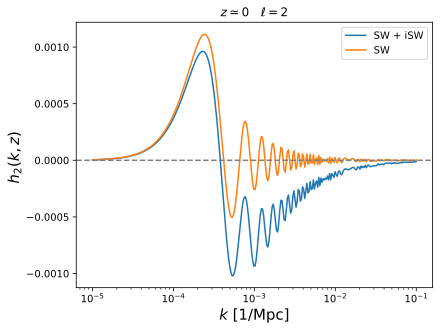

In [3]:
k_arr = np.logspace(-5,-1,300)
plt.semilogx(k_arr, [theory.h_ell(_k_, 1e-4, ell=2) for _k_ in k_arr], label='SW + iSW')
plt.semilogx(k_arr, [theory.h_ell(_k_, 1e-4, ell=2, terms='SW') for _k_ in k_arr], label='SW')
plt.axhline(ls='--', c='grey')
plt.legend()
plt.title(r'$z \simeq 0 \quad \ell =2$')
plt.xlabel(r'$k$ [1/Mpc]', size=15)
plt.ylabel(r'$h_2(k,z)$ ', size=15)

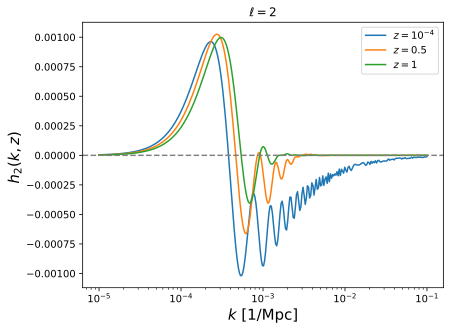

In [4]:
k_arr = np.logspace(-5,-1,300)
plt.semilogx(k_arr, [theory.h_ell(_k_, 1e-4, ell=2) for _k_ in k_arr], label=r'$z=10^{-4}$')
plt.semilogx(k_arr, [theory.h_ell(_k_, 0.5 , ell=2) for _k_ in k_arr], label=r'$z=0.5$')
plt.semilogx(k_arr, [theory.h_ell(_k_, 1   , ell=2) for _k_ in k_arr], label=r'$z=1$')
plt.axhline(ls='--', c='grey')
plt.title(r'$\ell =2$')
plt.xlabel(r'$k$ [1/Mpc]', size=15)
plt.ylabel(r'$h_2(k,z)$ ', size=15)
plt.legend()
plt.tight_layout()

### CMB polarization field auto spectrum  

In [5]:
zs2 = np.linspace(0.05,2,15)
xi_2 = np.asarray([theory.xi(_z_,_z_,2) for _z_ in zs2]);
xi_3 = np.asarray([theory.xi(_z_,_z_,3) for _z_ in zs2]);
xi_4 = np.asarray([theory.xi(_z_,_z_,4) for _z_ in zs2]);
xi_5 = np.asarray([theory.xi(_z_,_z_,5) for _z_ in zs2]);

/Users/fbianc/Research/pSZ/pSZ/pSZ.py:278: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return self.TCMBmuK**2 * integrate.quad(self.integrand_xi, kmin, kmax, args=(r, rp, ell), epsabs=epsabs, epsrel=epsrel, limit=limit)[0]


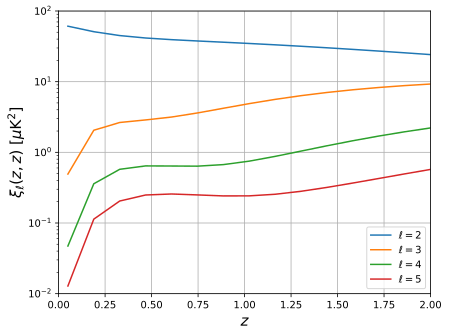

In [6]:
plt.semilogy(zs2, xi_2, label=r'$\ell=2$')
plt.semilogy(zs2, xi_3, label=r'$\ell=3$')
plt.semilogy(zs2, xi_4, label=r'$\ell=4$')
plt.semilogy(zs2, xi_5, label=r'$\ell=5$')
plt.ylim(1e-2,1e2)
plt.xlim(0,2)
plt.legend(loc='best')
plt.grid()
plt.xlabel(r'$z$', size=15)
plt.ylabel(r'$\xi_{\ell}(z,z)$ [$\mu$K$^2$]', size=15)
plt.tight_layout()
# plt.savefig('plots/p_auto_z')#.pdf')

### CMB polarization field - CMB temperature cross-spectrum  

In [7]:
zs2 = np.linspace(0.05,2,15)
zeta_2 = np.asarray([theory.zeta(_z_,2) for _z_ in zs2]);
zeta_3 = np.asarray([theory.zeta(_z_,3) for _z_ in zs2]);
zeta_4 = np.asarray([theory.zeta(_z_,4) for _z_ in zs2]);
zeta_5 = np.asarray([theory.zeta(_z_,5) for _z_ in zs2]);

/Users/fbianc/Research/pSZ/pSZ/pSZ.py:311: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return self.TCMBmuK**2 * integrate.quad(self.integrand_zeta, kmin, kmax, args=(r, ell), epsabs=epsabs, epsrel=epsrel, limit=limit)[0]


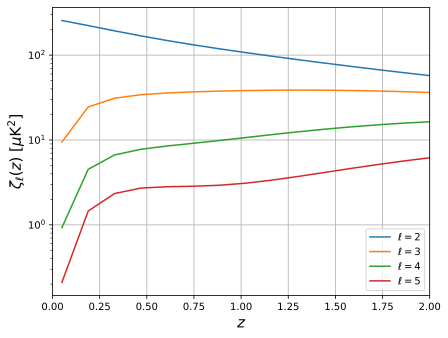

In [8]:
plt.semilogy(zs2, np.abs(zeta_2), label=r'$\ell=2$')
plt.semilogy(zs2, np.abs(zeta_3), label=r'$\ell=3$')
plt.semilogy(zs2, np.abs(zeta_4), label=r'$\ell=4$')
plt.semilogy(zs2, np.abs(zeta_5), label=r'$\ell=5$')
plt.xlim(0,2)
# plt.ylim(0.1,1.1)
plt.legend(loc='best')
plt.grid()
plt.xlabel(r'$z$', size=15)
plt.ylabel(r'$\zeta_{\ell}(z)$ [$\mu$K$^2$]', size=15)
plt.tight_layout()
# plt.savefig('plots/p_cross_z.pdf')

In [9]:
R_2 = np.asarray([theory.R(_z_,2) for _z_ in zs2]);
R_3 = np.asarray([theory.R(_z_,3) for _z_ in zs2]);
R_4 = np.asarray([theory.R(_z_,4) for _z_ in zs2]);
R_5 = np.asarray([theory.R(_z_,5) for _z_ in zs2]);

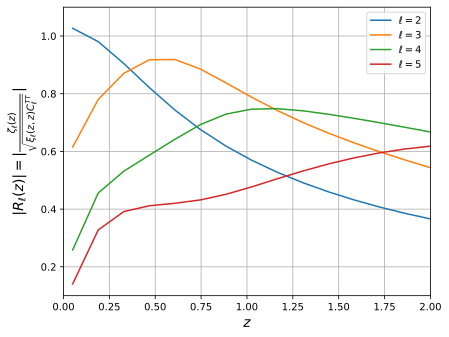

In [10]:
plt.plot(zs2, R_2, label=r'$\ell=2$')
plt.plot(zs2, R_3, label=r'$\ell=3$')
plt.plot(zs2, R_4, label=r'$\ell=4$')
plt.plot(zs2, R_5, label=r'$\ell=5$')
plt.xlim(0,2)
plt.ylim(0.1,1.1)
plt.legend(loc='best')
plt.grid()
plt.xlabel(r'$z$', size=14)
plt.ylabel(r'$|R_{\ell}(z)| = |\frac{\zeta_{\ell}(z)}{\sqrt{\xi_{\ell}(z,z)C_{\ell}^{TT}}}|$', size=14)
plt.tight_layout()
# plt.savefig('plots/R_z')#.pdf')